<a href="https://colab.research.google.com/github/bammu27/ML/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Logestic Regression:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/content/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65298 entries, 0 to 65297
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           65298 non-null  object 
 1   Location       65298 non-null  object 
 2   MinTemp        64679 non-null  float64
 3   MaxTemp        64848 non-null  float64
 4   Rainfall       63842 non-null  float64
 5   Evaporation    28173 non-null  float64
 6   Sunshine       21365 non-null  float64
 7   WindGustDir    59227 non-null  object 
 8   WindGustSpeed  59235 non-null  float64
 9   WindDir9am     58624 non-null  object 
 10  WindDir3pm     62535 non-null  object 
 11  WindSpeed9am   63929 non-null  float64
 12  WindSpeed3pm   63311 non-null  float64
 13  Humidity9am    64016 non-null  float64
 14  Humidity3pm    63559 non-null  float64
 15  Pressure9am    55209 non-null  float64
 16  Pressure3pm    55261 non-null  float64
 17  Cloud9am       37937 non-null  float64
 18  Cloud3

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,64679.000000,64848.000000,63842.000000,28173.000000,21365.000000,59235.000000,63929.000000,63311.000000,64016.000000,63559.000000,55209.000000,55261.000000,37937.000000,37159.000000,64352.000000,63837.000000
mean,11.397842,22.321623,2.508418,5.310659,7.435301,39.810197,13.397941,18.245629,71.488237,53.019273,1018.261465,1015.823251,4.606664,4.671143,16.024733,20.879047
std,6.387053,6.887341,8.712657,4.313724,3.813798,14.230242,9.236760,9.379320,17.715577,20.697049,7.015152,6.901594,2.922153,2.715958,6.114159,6.707737
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.800000,17.800000,0.000000,2.600000,4.600000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.500000
50%,11.700000,22.000000,0.000000,4.400000,8.400000,37.000000,13.000000,17.000000,72.000000,53.000000,1018.300000,1015.900000,5.000000,5.000000,16.400000,20.600000
75%,16.500000,26.700000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,85.000000,67.000000,1023.000000,1020.500000,7.000000,7.000000,20.600000,25.000000
max,30.500000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


In [6]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [7]:
px.histogram(df,x='Location',color='RainToday' ,title='location v/s rain ')

In [8]:
px.histogram(df, x='Temp3pm', title='Temperature at 3 pm vs. Rain Tomorrow', color='RainTomorrow')

In [9]:
px.scatter(df,x='MinTemp',y='MaxTemp',color='RainTomorrow' ,title='MinTemp V/s Maxtemp')

In [10]:
px.scatter(df,x='Humidity3pm',y='Temp3pm',color='RainTomorrow' ,title='Humidity V/s temp')

In [11]:
px.scatter(df,x='Pressure3pm',y='Cloud3pm',color='RainTomorrow',title='Pressure v/s cloud')

**Train Validation Test**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [14]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [15]:


print(f"Shape of Training Data:{train_df.shape}")
print(f"Shape of Validation Data:{val_df.shape}")
print(f"Shape of test Data:{test_df.shape}")


Shape of Training Data:(44702, 23)
Shape of Validation Data:(7348, 23)
Shape of test Data:(11038, 23)


In [16]:

input_cols = list(df.columns)[1:-1]
target_col ='RainTomorrow'

print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [17]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()


In [18]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()


In [19]:

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()














In [20]:
train_inputs.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [21]:
train_targets


0         No
1         No
2         No
3         No
4         No
        ... 
65292     No
65293     No
65294     No
65295     No
65296    Yes
Name: RainTomorrow, Length: 44702, dtype: object

In [22]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [23]:
train_inputs[cat_cols].nunique()

Location       22
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

# **DataPreprocessing**

Imputing Missing Numeric Data

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')



In [25]:
df[numeric_cols].isna().sum()

MinTemp            325
MaxTemp            201
Rainfall             0
Evaporation      35276
Sunshine         41779
WindGustSpeed     5379
WindSpeed9am       856
WindSpeed3pm      1645
Humidity9am        838
Humidity3pm       1422
Pressure9am       9440
Pressure3pm       9442
Cloud9am         25949
Cloud3pm         26758
Temp9am            520
Temp3pm           1159
dtype: int64

In [26]:
train_inputs[numeric_cols].isna().sum()

MinTemp            227
MaxTemp            133
Rainfall             0
Evaporation      21956
Sunshine         26568
WindGustSpeed     4190
WindSpeed9am       750
WindSpeed3pm       924
Humidity9am        600
Humidity3pm        581
Pressure9am       6618
Pressure3pm       6622
Cloud9am         16983
Cloud3pm         17583
Temp9am            468
Temp3pm            490
dtype: int64

In [27]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [28]:
list(imputer.statistics_)

[11.370814014626454,
 22.311108814222333,
 2.493226921126046,
 5.3011649647634105,
 7.436064573654325,
 39.77958377376146,
 13.355460213395038,
 18.23534007128558,
 71.43971084337349,
 52.94877241916129,
 1018.2643136743214,
 1015.8294484584126,
 4.583214410727268,
 4.658932012111203,
 15.995323488045008,
 20.859925075489674]

In [29]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])



In [30]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**Scaling Numeric Features**

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [34]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 7.0,
 0.0,
 0.0,
 3.0,
 1.0,
 980.5,
 979.0,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [35]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[30.5,
 47.3,
 371.0,
 145.0,
 14.1,
 135.0,
 130.0,
 83.0,
 100.0,
 100.0,
 1040.6,
 1037.9,
 9.0,
 8.0,
 37.7,
 46.7]

In [36]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [37]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000
mean,0.503835,0.516692,0.006608,0.035761,0.526784,0.257456,0.103222,0.220517,0.701402,0.521123,0.626717,0.623618,0.494476,0.572581,0.513031,0.501268
std,0.161662,0.129165,0.022895,0.018681,0.172418,0.106579,0.071216,0.113195,0.181995,0.207065,0.106501,0.106917,0.254523,0.261169,0.133112,0.125339
min,0.000000,0.013436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028953,0.005758
25%,0.387179,0.431862,0.000000,0.028966,0.527380,0.187500,0.053846,0.132530,0.587629,0.373737,0.565724,0.560272,0.333333,0.500000,0.420935,0.420345
50%,0.510256,0.510557,0.000000,0.036560,0.527380,0.250000,0.100000,0.204819,0.711340,0.524735,0.628358,0.625288,0.509246,0.582367,0.518931,0.495202
75%,0.633333,0.596929,0.001617,0.036560,0.527380,0.304688,0.146154,0.289157,0.835052,0.666667,0.690516,0.687606,0.666667,0.750000,0.612472,0.577735
max,1.000000,1.000000,1.000000,0.446897,1.000000,0.929688,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


**Encoding Categorical Data**

In [38]:
df[cat_cols].nunique()

Location       22
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [39]:
 from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [41]:
encoder.fit(df[cat_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [42]:
encoder.categories_

[array(['Albury', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Canberra',
        'Cobar', 'CoffsHarbour', 'MelbourneAirport', 'Moree',
        'MountGinini', 'Newcastle', 'NorahHead', 'NorfolkIsland',
        'Penrith', 'Richmond', 'Sale', 'Sydney', 'SydneyAirport',
        'Tuggeranong', 'WaggaWagga', 'Williamtown', 'Wollongong'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [43]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
print(encoded_cols)

['Location_Albury', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_MelbourneAirport', 'Location_Moree', 'Location_MountGinini', 'Location_Newcastle', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Penrith', 'Location_Richmond', 'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Tuggeranong', 'Location_WaggaWagga', 'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindGustDir_nan', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am

In [44]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])

In [45]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.561538,0.531670,0.001617,0.036560,0.527380,W,0.289062,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.407692,0.573896,0.000000,0.036560,0.527380,WNW,0.289062,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.548718,0.585413,0.000000,0.036560,0.527380,WSW,0.304688,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.453846,0.629559,0.000000,0.036560,0.527380,NE,0.132812,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.666667,0.712092,0.002695,0.036560,0.527380,W,0.265625,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65292,MelbourneAirport,0.482051,0.552783,0.005391,0.073103,0.836879,SW,0.382812,WSW,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65293,MelbourneAirport,0.497436,0.499040,0.000000,0.041379,0.269504,S,0.281250,WSW,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65294,MelbourneAirport,0.446154,0.508637,0.000000,0.038621,0.787234,S,0.320312,SW,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65295,MelbourneAirport,0.453846,0.591171,0.000000,0.044138,0.801418,SSE,0.265625,SW,W,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (44702, 96)
train_targets: (44702,)
val_inputs: (7348, 96)
val_targets: (7348,)
test_inputs: (11038, 96)
test_targets: (11038,)


# **Training a Logistic Regression Model**

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(solver='liblinear')

In [49]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [50]:
model.coef_

array([[ 9.19530301e-01, -2.72102569e+00,  3.18926440e+00,
        -1.01894421e-01, -1.61524011e+00,  5.66517354e+00,
        -6.60224616e-01, -1.13688664e+00, -8.11391268e-02,
         6.34277830e+00,  4.98565913e+00, -6.94002842e+00,
        -8.51043369e-02,  1.14089854e+00,  3.38648480e-01,
         3.19048232e+00,  4.52806460e-01,  2.26868754e-01,
        -3.12688934e-01,  1.74116139e-01,  9.88528902e-02,
         1.43355859e-01, -2.33581441e-01, -5.23522319e-01,
        -7.44080996e-02, -6.38298922e-01, -4.78172772e-01,
        -6.51544993e-01, -6.41483529e-01,  2.76654105e-01,
         1.20423533e-01, -2.29456418e-01, -1.53446846e-01,
        -2.56047217e-01,  4.04623734e-01,  1.82015895e-01,
        -1.52262137e-01, -9.28896414e-01, -3.34771746e-01,
        -2.52965126e-01, -3.23772158e-02, -1.95518431e-01,
        -3.65139366e-01, -3.10666245e-01, -2.48056024e-01,
        -2.26458588e-01, -1.22564700e-01, -3.57653251e-02,
        -5.84472031e-03, -5.83020105e-02, -1.76457504e-0

In [51]:
model.intercept_

array([-3.19409267])

# **Making Predictions and Evaluating the Model**

In [52]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [53]:
train_preds = model.predict(X_train)

In [54]:
train_targets

0         No
1         No
2         No
3         No
4         No
        ... 
65292     No
65293     No
65294     No
65295     No
65296    Yes
Name: RainTomorrow, Length: 44702, dtype: object

In [55]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [56]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.96042372, 0.03957628],
       [0.95227268, 0.04772732],
       [0.96539018, 0.03460982],
       ...,
       [0.96662984, 0.03337016],
       [0.98199945, 0.01800055],
       [0.84286627, 0.15713373]])

In [57]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(train_targets,train_preds)

0.8481499709185272

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94903601, 0.05096399],
       [0.51138336, 0.48861664]])

In [61]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 84.81%


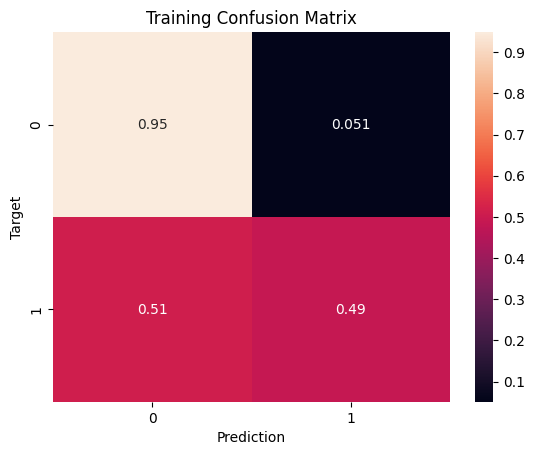

In [62]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 83.97%


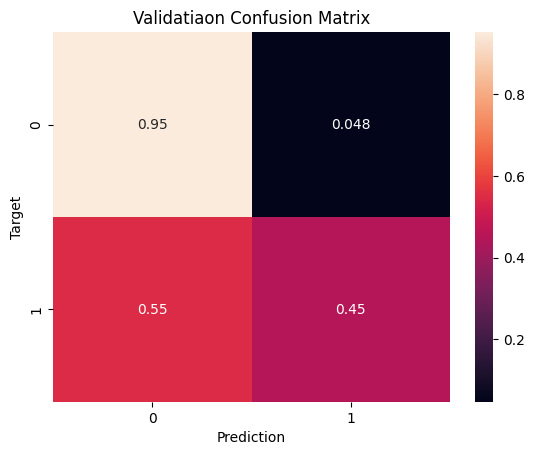

In [63]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
def build_model(input_col,target):
    model = LogisticRegression(solver='liblinear')

    model.fit(train_inputs[input_col],target)

    pred = model.predict(train_inputs[input_col])

    print(confusion_matrix(target, pred, normalize='true'))
    print(accuracy_score(target, pred))



**train model without categorical data**

In [66]:
build_model(numeric_cols,train_targets)

[[0.94705933 0.05294067]
 [0.53731496 0.46268504]]
0.8409243434298241


**train model without numerical data**

In [67]:
build_model(encoded_cols,train_targets)

[[0.9631879  0.0368121 ]
 [0.84338948 0.15661052]]
0.7864525077177755
